In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    0.387409
   2   -1.526160
   3   -0.506459
b  1   -0.648676
   3    0.034653
c  1    1.235938
   2    0.312884
d  2    0.731289
   3   -1.079963
dtype: float64

In [3]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           codes=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

In [11]:
print(data['b'])
print(data['b':'c'])
print(data.loc[['b', 'd']])
print(data.loc[:, 2]) #把内标签为2的数选出来

1   -0.648676
3    0.034653
dtype: float64
b  1   -0.648676
   3    0.034653
c  1    1.235938
   2    0.312884
dtype: float64
b  1   -0.648676
   3    0.034653
d  2    0.731289
   3   -1.079963
dtype: float64
a   -1.526160
c    0.312884
d    0.731289
dtype: float64


In [12]:
data.unstack() 

,1,2,3
a,0.387409,-1.526160,-0.506459
b,-0.648676,NaN,0.034653
c,1.235938,0.312884,NaN
d,NaN,0.731289,-1.079963


In [13]:
data.unstack().stack()

a  1    0.387409
   2   -1.526160
   3   -0.506459
b  1   -0.648676
   3    0.034653
c  1    1.235938
   2    0.312884
d  2    0.731289
   3   -1.079963
dtype: float64

In [14]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [15]:
frame.index.names = ['key1', 'key2'] #各层都可以有名字，可以是字符串也可以是别的python对象
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [16]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [18]:
#创建MultiIndex，然后复用
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
                       names=['state', 'color'])

MultiIndex(levels=[['Colorado', 'Ohio'], ['Green', 'Red']],
           codes=[[1, 1, 0], [0, 1, 0]],
           names=['state', 'color'])

### 重排与分级排序 

Signature: pd.DataFrame.swaplevel(self, i=-2, j=-1, axis=0)
Docstring:
Swap levels i and j in a MultiIndex on a particular axis.

In [20]:
#swaplevel 接受两个级别编号或名称，并返回一个互换了级别的新对象
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

pd.DataFrame.sort_index(
    self,
    axis=0,
    level=None,
    ascending=True,
    inplace=False,
    kind='quicksort',
    na_position='last',
    sort_remaining=True,
    by=None,
)

In [28]:
#sort_index 根据索引进行排序
frame.sort_index(level=1) #根据第2层索引进行排序

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [29]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### 根据级别汇总统计 

In [33]:
#dataframe和series的描述和汇总统计总有一个level选项，可以用来指定对某条轴上求和的级别(索引层次)
frame.sum(level='key2') #此处level='key2' 和 key=1等价

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [34]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 使用DataFrame的列进行索引 

In [35]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


Signature:
pd.DataFrame.set_index(
    self,
    keys,
    drop=True,
    append=False,
    inplace=False,
    verify_integrity=False,
)
Docstring:
Set the DataFrame index using existing columns.

In [46]:
#set_index 将其一个或多个列转换为行索引，并创建一个新DataFrame
frame2 = frame.set_index(['c', 'd'], drop=False) 
frame2.columns=['a', 'b', 'e', 'f']
frame2

a  b    e  f
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [47]:
#reset_index
frame2.reset_index() #如果index在dataframe中已存在相同名字的列，执行此语句会出错(set_index中drop=False)

,c,d,a,b,e,f
0,one,0,0,7,one,0
1,one,1,1,6,one,1
2,one,2,2,5,one,2
3,two,0,3,4,two,0
4,two,1,4,3,two,1
5,two,2,5,2,two,2
6,two,3,6,1,two,3


## 8.2 合并数据集

### 数据库风格的DataFrame合并

pd.merge(
    left,
    right,
    how='inner',
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=('_x', '_y'),
    copy=True,
    indicator=False,
    validate=None,
)

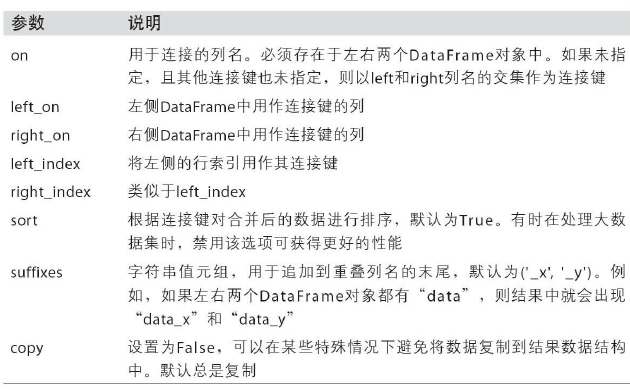

In [48]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
print(df1)
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2


In [50]:
pd.merge(df1, df2, on='key') #未指定连接的列则默认用重叠的列的列名当作键

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [51]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey') #分别指定连接的列名

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [52]:
pd.merge(df1, df2, how="outer")

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [53]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
pd.merge(df1, df2, on='key', how='left') #多对多连接产生的是行的笛卡儿积

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [54]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [55]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [58]:
pd.merge(left, right, on='key1', suffixes=['_left', '_right']) #重复列名的处理,suffixes指定添加后缀

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### 索引上的合并 

In [60]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
pd.merge(left1, right1, left_on='key', right_index=True) #left/right_index=True指定索引被用作连接键

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [61]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [62]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
print(lefth)
print(righth)

     key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11


In [64]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [65]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


pd.DataFrame.join(
    self,
    other,
    on=None,
    how='left',
    lsuffix='',
    rsuffix='',
    sort=False,
)

In [67]:
#join 方便的实现按索引合并；还可用于合并多个带有相同或相似索引的DataFrame对象，但要求没有重叠的列
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [74]:
#join 默认左连接，保留左边表的行索引。支持在调用的DataFrame的列上，连接传递的DataFrame索引
print(left1)
print(right1)

left1.join(right1, on='key')

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0


,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [70]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
print(another)
#Joining multiple DataFrames only supported for joining on index
left2.join([right2, another], how='outer') #同时连接多个表 右边组的DataFrame需要有相同的索引或者列？

   New York  Oregon
a       7.0     8.0
c       9.0    10.0
e      11.0    12.0
f      16.0    17.0


D:\Anaconda\lib\site-packages\pandas\core\frame.py:6848: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### 轴向连接 

In [75]:
arr = np.arange(12).reshape((3, 4))
print(arr)
np.concatenate([arr, arr], axis=1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

pd.concat(
    objs,
    axis=0,
    join='outer',
    join_axes=None,
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    sort=None,
    copy=True,
)

In [79]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])
print(pd.concat([s1, s2, s3], axis=1))
pd.concat([s1, s2, s3])

     0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [83]:
s4 = pd.concat([s1, s3])
print(s4)
print(pd.concat([s1, s4], axis=1))
print(pd.concat([s1, s4], axis=1, join='inner'))

a    0
b    1
f    5
g    6
dtype: int64
     0  1
a  0.0  0
b  1.0  1
f  NaN  5
g  NaN  6
   0  1
a  0  0
b  1  1


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
#通过join_axes指定要在其他轴上使用的索引
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']]) #c、e不在结果行标签中，自动填充NaN

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN
f,NaN,5.0


In [89]:
#用keys参数创建一个层次化索引
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])#第一个s1外索引为one,第二个为two
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [90]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
print(df1)
print(df2)
#默认按index进行连接，axis=1指定列连接，keys指定层次化列索引
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

   one  two
a    0    1
b    2    3
c    4    5
   three  four
a      5     6
c      7     8


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [92]:
#传入的不是列表而是字典，则字典的键会被当成Keys选项的值，构成层次化索引
pd.concat({'level1':df1, 'level2':df2}, axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [98]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
print(df1)
print(df2)
pd.concat([df1, df2], ignore_index=True, sort=False)#原结果索引为01201,相当于加一句reset_index(drop=True)

          a         b         c         d
0 -0.013319 -0.474866 -2.136148  1.182291
1  0.520485  0.619740  0.147378  0.802606
2 -0.683326  1.259777  0.833671  0.293469
          b         d         a
0  1.037002  0.634273 -0.948168
1 -0.107508 -0.733499  1.056957


,a,b,c,d
0,-0.013319,-0.474866,-2.136148,1.182291
1,0.520485,0.619740,0.147378,0.802606
2,-0.683326,1.259777,0.833671,0.293469
3,-0.948168,1.037002,NaN,0.634273
4,1.056957,-0.107508,NaN,-0.733499


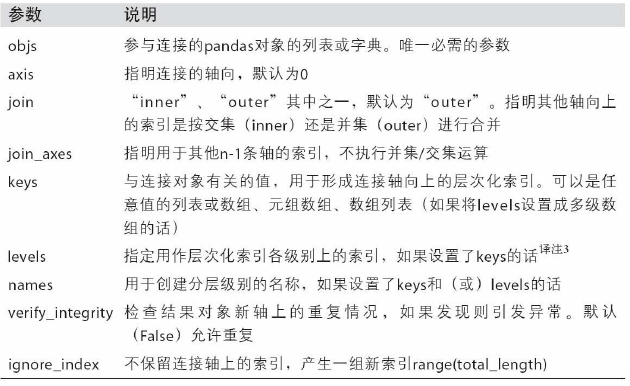

### 合并重叠数据 

In [99]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
print(a)
print(b)
#np.where 面向数组的if-else
np.where(pd.isnull(a), b, a)

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64
f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64


array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [111]:
#Signature: pd.Series.combine_first(self, other)
#Combine Series values, choosing the calling Series's values first.
a = pd.Series([np.nan, 2.5, np.nan, np.nan, 4.5, 666],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
print(b[:-2])
print(b[:-2].combine_first(a))
#a.combine_first(b): a中为np.nan的数据在b对应index有值则用b中的值替代；
                    #b中有a中没有的Index(无论是不是np.nan)都添加进去
b[:-3].combine_first(a[2:]) 

f    0.0
e    1.0
d    2.0
c    3.0
dtype: float64
a    666.0
b      4.5
c      3.0
d      2.0
e      1.0
f      0.0
dtype: float64


a    666.0
b      4.5
c      NaN
d      2.0
e      1.0
f      0.0
dtype: float64

In [113]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
print(df1)
print(df2)
#用传递对象中的数据为调用对象的缺失数据“打补丁”
df1.combine_first(df2) 

     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14
     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0


,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 8.3 重塑和轴向旋转 

### 重塑层次化索引 (stack,unstack)

stack:将数据的列旋转为行 pd.DataFrame.stack(self, level=-1, dropna=True)；
unstack：将数据的行旋转为列 pd.Series.unstack(self, level=-1, fill_value=None)

In [114]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [119]:
result = data.stack() #把数据旋转，列标签作为行标签的最内层(默认)标签，变成层次化标签的series
print(result)
result.unstack() #把最内层(默认)标签变为列标签，数据旋转

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32


number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [123]:
print(data)
#data.stack().unstack(0) #相当于实现了行列互换
print(result.unstack('state'))
result.unstack(0) #传入分层级别的编号/名称可以对其他级别(默认值为-1表示最内层)进行unstack操作


number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5


state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [127]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
print(data2)
print(data2.unstack()) #不是所有的级别值都能在各分组中找到的话，填充缺失值
print(data2.unstack().stack()) #stack默认滤除缺失数据，运算可逆
data2.unstack().stack(dropna=False)

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64
       a    b    c    d    e
one  0.0  1.0  2.0  3.0  NaN
two  NaN  NaN  4.0  5.0  6.0
one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64


one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [128]:
#对DataFrame进行unstack操作时，作为旋转轴的级别将会成为结果中的最低级别（最内层？）
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
print(df)
df.unstack('state')

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10


side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [132]:
print(df.unstack('state').stack())
#调用stack可以指定轴的名字(应该是指定要旋转的是哪个轴，不是改结果的轴名)
df.unstack('state').stack('side') 

side             left  right
number state                
one    Ohio         0      5
       Colorado     3      8
two    Ohio         1      6
       Colorado     4      9
three  Ohio         2      7
       Colorado     5     10


state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### 成格式旋转为宽格式 

In [133]:
import os
os.chdir(r'E:\personal_file\study_file\python数据分析学习\pydata-book-2nd-edition')

In [150]:
data = pd.read_csv('examples/macrodata.csv')
print(data.head())
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
print(data.head())
data.index = periods.to_timestamp('D', 'end')
print(data.head())
ldata = data.stack().reset_index().rename(columns={0: 'value'})
ldata[:5]

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  
item   realgdp  infl  unemp
0     2710.349  0.00    5.8
1     2778.801  2.34    5.1
2     2775.488  2.74    5.3
3     2785.204  0.27    5.6
4     2847.699  2.31    5.2
item                            realgdp  infl  unemp
date

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


In [152]:
pivoted = ldata.pivot('date', 'item', 'value') #index=date, columns=item, value
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
1960-06-30 23:59:59.999999999,0.14,2834.390,5.2
1960-09-30 23:59:59.999999999,2.70,2839.022,5.6
1960-12-31 23:59:59.999999999,1.21,2802.616,6.3
1961-03-31 23:59:59.999999999,-0.40,2819.264,6.8


In [154]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.897439
1,1959-03-31 23:59:59.999999999,infl,0.000,0.692297
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.145893
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.372789
4,1959-06-30 23:59:59.999999999,infl,2.340,1.834252
5,1959-06-30 23:59:59.999999999,unemp,5.100,-0.441508
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-1.417453
7,1959-09-30 23:59:59.999999999,infl,2.740,2.300212
8,1959-09-30 23:59:59.999999999,unemp,5.300,-0.858865
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,-1.849300


In [156]:
pivoted = ldata.pivot('date', 'item') #忽略最后一个参数，得到的dataframe就会带层次化的列(无论value是一列还是多个列)
print(pivoted[:5])
pivoted['value'][:5]

                              value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.692297 -0.897439   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  1.834252  0.372789   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  2.300212 -1.417453   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -0.337214 -1.849300   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.849560  0.050202   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.145893  
1959-06-30 23:59:59.999999999 -0.441508  
1959-09-30 23:59:59.999999999 -0.858865  
1959-12-31 23:59:59.999999999  0.278739  
1960-03-31 23:59:59.999999999  2.594728  


item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [158]:
#pivot其实就是用set_index创建层次化索引，再用unstack重塑(只是修改了结构，值并没有发生运算)
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value    value2
date                          item                       
1959-03-31 23:59:59.999999999 realgdp  2710.349 -0.897439
                              infl        0.000  0.692297
                              unemp       5.800  0.145893
1959-06-30 23:59:59.999999999 realgdp  2778.801  0.372789
                              infl        2.340  1.834252
                              unemp       5.100 -0.441508
1959-09-30 23:59:59.999999999 realgdp  2775.488 -1.417453

### 将宽格式旋转为长格式 

pd.melt(
    frame,
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name='value',
    col_level=None,
)

In [165]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [169]:
#将多个列合并成一个原有列，variable为原来的出key的列名
melted = pd.melt(df, ['key']) #用key作为唯一的分组指标，注意key是放在列表内
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [168]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [170]:
reshaped.reset_index()#pivot的结果是从列中取一列来创建为索引，作为行标签。用reset_index将数据移回去

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [172]:
print(df)
pd.melt(df, id_vars=['key'], value_vars=['A', 'B']) #指定列的自己作为值的列

   key  A  B  C
0  foo  1  4  7
1  bar  2  5  8
2  baz  3  6  9


,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [177]:
print(pd.melt(df, id_vars=['key'], value_vars=['A', 'B', 'C'])
pd.melt(df, value_vars=['A', 'B', 'C'])#不用分组指标

SyntaxError: invalid syntax (<ipython-input-177-6f60e6958aa2>, line 2)

In [175]:
#指定了分组指标则默认剩下的列作为值的列；指定了作为值的列可以省略分组指标的列
#一定要满足条件：id_vars+value_vars == list(df.columns)
pd.melt(df, value_vars=['key', 'A', 'B']) 

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6
